[< list of demos](Introduction.ipynb#demos)

<a id='top'></a>
# Binary orbit fit - HD 239960

This demo shows how to fit a binary model to data, using [HD 239960](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=HD+239960) as an example.

**Note:** This demo illustrates MCMC fitting setup and due to a large number of parameters it can take a long time (~ minutes in this case) to converge depending on your CPU and a number of cores you set. 

## Arguments:

`-p HD239960` - primary star. PEXO retieves target information from Simbad and astrometry from Gaia/Hipparcos

`-m fit` - PEXO mode

`-N 100` - number of MCMC walkers

`-n 4` - number of cores to use, default: 4

`-C 1` - number of companions

`-o ../results/HD239960-fit.Robj` - output file

### Parameter file

To specify binary system parameters, create a `.par` file with the following quantities and save the file to `pexo/input/<starname>.par` and PEXO will find it using the primary star name you specify.

In [3]:
from utilities import Table
Table("../input/HD239960.par", take_all=True, left_header=0, header=None)

secondary,HD239960B
logmC,-1.737
logP,10.281
e,0.520
I,79.32
omegaT,232.006
Omega,205.064
Tp,2435328.96


## Run the code

Execute PEXO with the command below. This may take a few minutes to compute, probably not enough to grap a coffee though.

In [4]:
# cd into the code directory
%cd ../code

# run PEXO via the R script
! Rscript pexo.R -p HD239960 -m fit -N 100 -n 4 -C 1 -o ../results/HD239960-fit.Robj

/home/timberhill/repositories/pexo/code
Warning message:
package ‘optparse’ was built under R version 3.6.3 
Loading required package: polynom
Warning messages:
1: package ‘orthopolynom’ was built under R version 3.6.3 
2: package ‘polynom’ was built under R version 3.6.3 

Attaching package: ‘pracma’

The following object is masked from ‘package:polynom’:

    integral

Warning message:
package ‘pracma’ was built under R version 3.6.3 
Warning message:
package ‘foreach’ was built under R version 3.6.3 
Loading required package: iterators
Loading required package: parallel
Warning messages:
1: package ‘doMC’ was built under R version 3.6.3 
2: package ‘iterators’ was built under R version 3.6.3 

Attaching package: ‘e1071’

The following object is masked from ‘package:pracma’:

    sigmoid

Warning message:
package ‘e1071’ was built under R version 3.6.3 
Warning message:
package ‘MASS’ was built under R version 3.6.3 
Loading required package: spam
Loading required package: dotCall64


## Output

The output file (`HD239960-fit.Robj`) is an R object that contins all the information about the computation process. 

### Data vs model:

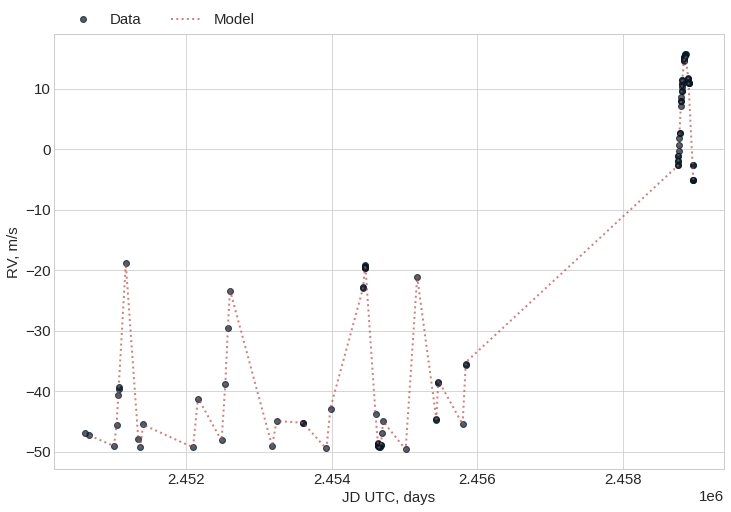

In [9]:
from utilities import FitOutput, Plot
output = FitOutput("../results/HD239960-fit.Robj")
p = Plot(data=output.data.dictionary, factors=(1, 1e-3)).add_plot(xcol="utc", ycol="V1", marker="o", legend="Data")
p = Plot(data=output.model.dictionary, factors=(1, 1e-3), plot_instance=p).add_plot(xcol="utc", ycol="V1", line=":", colour="#BC4B51", legend="Model")
o=p.axis.set_xlabel("JD UTC, days")
o=p.axis.set_ylabel("RV, m/s")

### Fitted values and their statistical properties:

In [10]:
from utilities import Table
Table(lines=[" ".join([str(x) for x in line]) for line in output.parstat], take_all=True, left_header=0, header=0, digits=5)

,xopt,x1per,x99per,x10per,x90per,xminus,xplus,mode,mean,sd,skewness,kurtosis
raOff,-0.00047,-0.00085,-0.00027,-0.00085,-0.00031,-0.00073,-0.00031,-0.00036,-0.00051,0.00018,-0.50272,-1.14559
decOff,-0.00459,-0.00535,-0.00312,-0.00508,-0.00326,-0.00494,-0.00336,-0.00494,-0.00420,0.00073,0.08929,-1.67892
pmraOff,0.01251,0.01205,0.01390,0.01223,0.01349,0.01226,0.01347,0.01226,0.01287,0.00058,0.15160,-1.59578
pmdecOff,-0.02628,-0.02678,-0.02355,-0.02630,-0.02372,-0.02628,-0.02415,-0.02609,-0.02536,0.00096,0.62678,-1.11382
plxOff,0.04100,0.03940,0.04269,0.03958,0.04239,0.03991,0.04239,0.04239,0.04120,0.00106,-0.16109,-1.39075
logjitterRv.HD239960.APF,-0.00448,-0.00544,-0.00192,-0.00498,-0.00217,-0.00461,-0.00263,-0.00455,-0.00374,0.00099,0.30101,-1.24830
bRv.HD239960.APF,-34.67639,-34.67922,-34.67095,-34.67758,-34.67125,-34.67687,-34.67263,-34.67687,-34.67488,0.00226,0.19156,-1.28925
logjitterRv.HD239960.KECK,0.12475,0.12324,0.12667,0.12324,0.12631,0.12355,0.12631,0.12631,0.12515,0.00111,-0.34862,-1.32209
bRv.HD239960.KECK,0.47641,0.47593,0.47740,0.47625,0.47709,0.47641,0.47704,0.47679,0.47669,0.00030,0.07467,-0.15983
logmC1,-1.72255,-1.72701,-1.71966,-1.72662,-1.72083,-1.72538,-1.72115,-1.72115,-1.72330,0.00214,-0.18511,-1.38658
